<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [17.2 Linear Interpolation](chapter17.02-Linear-Interpolation.ipynb)  | [Contents](Index.ipynb) | [17.4 Lagrange Polynomial Interpolation](chapter17.04-Lagrange-Polynomial-Interpolation.ipynb) >

# Cubic Spline Interpolation

In **cubic spline interpolation** (as shown in the following figure), the interpolating function is a set of piecewise cubic functions. Specifically, we assume that the points $(x_i, y_i)$ and $(x_{i+1}, y_{i+1})$ are joined by a cubic polynomial $S_i(x) = a_i x^3 + b_i x^2 + c_i x + d_i$ that is valid for $x_i \le x \le x_{i+1}$ for $i = 1,\ldots, n-1$. To find the interpolating function, we must first determine the coefficients $a_i, b_i, c_i, d_i$ for each of the cubic functions. For $n$ points, there are $n-1$ cubic functions to find, and each cubic function requires four coefficients. Therefore we have a total of $4(n-1)$ unknowns, and so we need $4(n-1)$ independent equations to find all the coefficients.

<img src="./images/17.03.01-Illustration_of_cubic_interpolation.jpg" alt="Cubic Interpolation" title="Illustration of cubic spline interpolation." width="200"/>

First we know that the cubic functions must intersect the data the points on the left and the right:

\begin{eqnarray*}
S_i(x_i) &=& y_i,\quad i = 1,\ldots,n-1,\\
S_i(x_{i+1}) &=& y_{i+1},\quad i = 1,\ldots,n-1,
\end{eqnarray*}

which gives us $2(n-1)$ equations. Next, we want each cubic function to join as smoothly with its neighbors as possible, so we constrain the splines to have continuous first and second derivatives at the data points $i = 2,\ldots,n-1$.

\begin{eqnarray*}
S^{\prime}_i(x_{i+1}) &=& S^{\prime}_{i+1}(x_{i+1}),\quad i = 1,\ldots,n-2,\\
S''_i(x_{i+1}) &=& S''_{i+1}(x_{i+1}),\quad i = 1,\ldots,n-2,
\end{eqnarray*}

which gives us $2(n-2)$ equations.

Two more equations are required to compute the coefficients of $S_i(x)$. These last two constraints are arbitrary, and they can be chosen to fit the circumstances of the interpolation being performed. A common set of final constraints is to assume that the second derivatives are zero at the endpoints. This means that the curve is a "straight line" at the end points. Explicitly,

\begin{eqnarray*}
S''_1(x_1) &=& 0\\
S''_{n-1}(x_n) &=& 0.
\end{eqnarray*}

In Python, we can use *scipy's* function *CubicSpline* to perform cubic spline interpolation. Note that the above constraints are not the same as the ones used by scipy's *CubicSpline* as default for performing cubic splines, there are different ways to add the final two constraints in scipy by setting the *bc_type* argument (see the help for *CubicSpline* to learn more about this). 

**TRY IT!** Use *CubicSpline* to plot the cubic spline interpolation of the data set *x = [0, 1, 2]* and *y = [1, 3, 2]* for $0\le x\le2$. 

In [1]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [2]:
x = [0, 1, 2]
y = [1, 3, 2]

# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

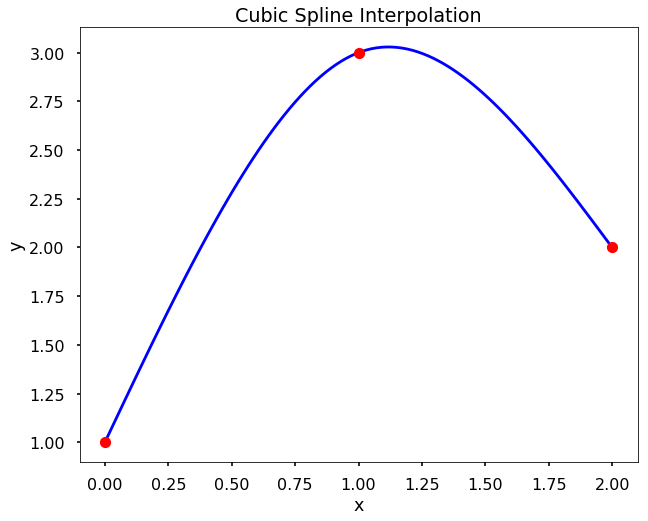

In [3]:
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

To determine the coefficients of each cubic function, we write out the constraints explicitly as a system of linear equations with $4(n-1)$ unknowns. For $n$ data points, the unknowns are the coefficients $a_i, b_i, c_i, d_i$ of the cubic spline, $S_i$ joining the points $x_i$ and $x_{i+1}$.

For the constraints $S_i(x_i) = y_i$ we have:
$$
\begin{array}{rrrrr}
a_1 x_1^3 + & b_1 x_1^2 +  & c_1 x_1 +  & d_1 = &y_1,\\ 
a_2 x_2^3 + & b_2 x_2^2 +  & c_2 x_2 +  & d_2 = &y_2,\\ 
\cdots\\ 
a_{n-1} x_{n-1}^3 + &b_{n-1} x_{n-1}^2 + &c_{n-1} x_{n-1} +& d_{n-1} =& y_{n-1}.
\end{array}
$$

For the constraints $S_i(x_{i+1}) = y_{i+1}$ we have:
$$
\begin{array}{rrrrr}
a_1 x_2^3 +&b_1 x_2^2 +&c_1 x_2 +&d_1 =& y_2,\\ 
a_2 x_3^3 +&b_2 x_3^2 +&c_2 x_3 +&d_2 =& y_3,\\
&&\cdots\\
a_{n-1} x_{n}^3 +&b_{n-1} x_{n}^2 +&c_{n-1} x_{n} +&d_{n-1} =& y_{n}.
\end{array}
$$

For the constraints $S^{\prime}_i(x_{i+1}) = S^{\prime}_{i+1}(x_{i+1})$ we have:
$$
\begin{array}{rrrrrr}
3a_1 x_2^2 +&2b_1 x_2 +&c_1 - &3a_2 x_2^2 - &2b_2 x_2 - &c_2 =0,\\ 
3a_2 x_3^2 +&2b_2 x_3 +&c_2 -& 3a_3 x_3^2 -& 2b_3 x_3 -& c_3 =0,\\ 
&&&\cdots&&,\\
3a_{n-2} x_{n-1}^2 +&2b_{n-2} x_{n-1} +&c_{n-2} -& 3a_{n-1} x_{n-1}^2 -& 2b_{n-1} x_{n-1} -& c_{n-1} =0.
\end{array}
$$

For the constraints $S''_i(x_{i+1}) = S''_{i+1}(x_{i+1})$ we have:

$$
\begin{array}{rrrrrr}
6a_1 x_2 +& 2b_1 -& 6a_2 x_2 -& 2b_2 =& 0,\\
6a_2 x_3 +& 2b_2 -& 6a_3 x_3 -& 2b_3 =& 0,\\
+&&\ldots -& \\
6a_{n-2} x_{n-1} +& 2b_{n-2} -& 6a_{n-1} x_{n-1} -& 2b_{n-1} =& 0.
\end{array}
$$

Finally for the endpoint constraints $S''_1(x_1) = 0$ and $S''_{n-1}(x_n) = 0$, we have:
$$
\begin{array}{rr}
6a_1 x_1 +& 2b_1 = 0,\\
6a_{n-1} x_n +&2b_{n-1} = 0.
\end{array}
$$

These equations are linear in the unknown coefficients $a_i, b_i, c_i$, and $d_i$. We can put them in matrix form and solve for the coefficients of each spline by left division. Remember that whenever we solve the matrix equation $Ax = b$ for $x$, we must make be sure that $A$ is square and invertible. In the case of finding cubic spline equations, the $A$ matrix is always square and invertible as long as the $x_i$ values in the data set are unique.

**TRY IT!** Find the cubic spline interpolation at *x = 1.5* based on the data *x = [0, 1, 2]*, *y = [1, 3, 2]*.

First we create the appropriate system of equations and find the coefficients of the cubic splines by solving the system in matrix form.}

The matrix form of the system of equations is:
$$
\left[\begin{array}{llllllll}
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 8 & 4 & 2 & 1\\
3 & 2 & 1 & 0 & -3 & -2 & -1 & 0\\
6 & 2 & 0 & 0 & -6 & -2 & 0 & 0\\
0 & 2 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 12 & 2 & 0 & 0
\end{array}\right]
\left[\begin{array}{c}
a_1 \\
b_1 \\
c_1 \\
d_1 \\
a_2 \\
b_2 \\
c_2 \\
d_2
\end{array}\right] =
\left[\begin{array}{c}
1 \\
3 \\
3 \\
2 \\
0 \\
0 \\
0 \\
0 \end{array}\right]
$$

In [4]:
b = np.array([1, 3, 3, 2, 0, 0, 0, 0])
b = b[:, np.newaxis]
A = np.array([[0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0], \
             [0, 0, 0, 0, 8, 4, 2, 1], [3, 2, 1, 0, -3, -2, -1, 0], [6, 2, 0, 0, -6, -2, 0, 0],\
             [0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 12, 2, 0, 0]])

In [5]:
np.dot(np.linalg.inv(A), b)

array([[-0.75],
       [ 0.  ],
       [ 2.75],
       [ 1.  ],
       [ 0.75],
       [-4.5 ],
       [ 7.25],
       [-0.5 ]])

Therefore, the two cubic polynomials are

\begin{eqnarray*}
S_1(x) &=& -.75x^3 + 2.75x + 1, \quad  for \quad 0 \le x \le 1\ and\\
S_2(x) &=& .75x^3 - 4.5x^2 + 7.25x - .5, \quad  for  \quad 1 \le x \le 2
\end{eqnarray*}

So for $x = 1.5$ we evaluate $S_2(1.5)$ and get an estimated value of 2.7813.

<!--NAVIGATION-->
< [17.2 Linear Interpolation](chapter17.02-Linear-Interpolation.ipynb)  | [Contents](Index.ipynb) | [17.4 Lagrange Polynomial Interpolation](chapter17.04-Lagrange-Polynomial-Interpolation.ipynb) >